In [1]:
from argparse import Namespace
from classifier import *

from dataset import *
from vectorizer import *

import torch


/home/nikos/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def use_cuda():
    return torch.device("cpu" if torch.cuda.is_available() else "cpu")

args = Namespace (
    in_features=None,
    out_units=3,
    units_per_layer=[128, 64],
    dataset=None,
    optimizer="Adam",
    criterion="bce_ls",
    save_dir='../trained_models/bow.pth',
    batch_size=128,
    learning_rate=0.001,
    num_epochs=10,
    device=use_cuda(),
    binary_class=False,
    embed_dim=300,
    freeze_embedding=False,
    filter_sizes=[3, 4, 5],
    num_filters=[100, 100, 100],
    pretrained_embedding=None
)

In [3]:
args.dataset = TextDataset.load_dataset_and_make_vectorizer("../data/Tweets.csv")
args.in_features = len(args.dataset.vectorizer.text_vocab)
args.out_features = len(args.dataset.vectorizer.label_vocab)

[nltk_data] Downloading package stopwords to /home/nikos/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
bow = BOWClassifier(args=args)
bow.setup()
bow.fit()

100%|██████████| 10/10 [00:17<00:00,  1.71s/it]


In [5]:
loss, acc, f1 = bow.eval_net(mode='test')
print(loss)
print(acc)
print(f1)

0.6503407738425515
73.54403409090911
66.246281708505


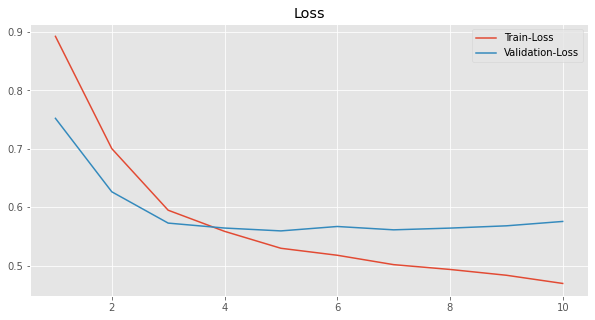

In [6]:
bow.plot_logs(title="Loss", legend=["Train-Loss", "Validation-Loss"])

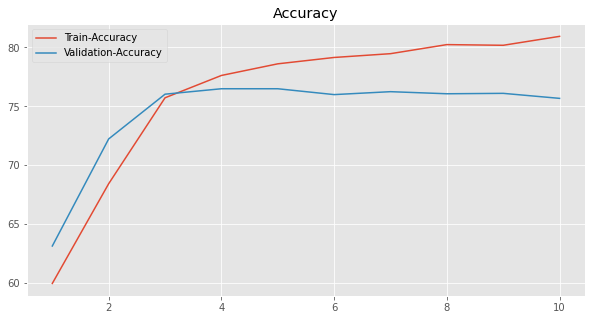

In [7]:
bow.plot_logs(title="Accuracy", legend=["Train-Accuracy", "Validation-Accuracy"])

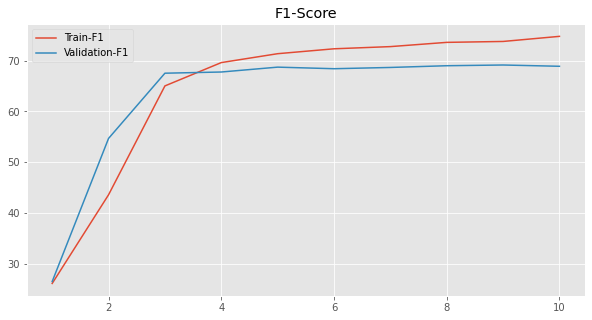

In [8]:
bow.plot_logs(title="F1-Score", legend=["Train-F1", "Validation-F1"])

In [10]:
args.dataset = TextDataset.load_dataset_and_make_vectorizer("../data/Tweets.csv", vectorizer_mode="padded")
args.in_features = len(args.dataset.vectorizer.text_vocab)
args.out_features = len(args.dataset.vectorizer.label_vocab)
args.pretrained_embedding = args.dataset.vectorizer.load_pretrained_embed("../data/crawl-300d-2M.vec")

[nltk_data] Downloading package stopwords to /home/nikos/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
1999995it [00:29, 68082.04it/s]


In [11]:
cnn = CNNClassifier(args=args)
cnn.setup()
cnn.fit()

100%|██████████| 10/10 [04:09<00:00, 24.97s/it]


In [ ]:
loss, acc, f1 = cnn.eval_net(mode='test')
print(loss)
print(acc)
print(f1)

0.7150252976200797
73.89914772727275
66.53560421664113


In [ ]:
# from torch.autograd import Variable

# class LSTM1(MLP):
#     def __init__(self, args, input_size, hidden_size, num_layers):
#         super().__init__(args)
        
#         self.num_layers = num_layers #number of layers
#         self.input_size = input_size #input size
#         self.hidden_size = hidden_size #hidden state
#         # self.seq_length = seq_length #sequence length

#         self.lstm = nn.LSTM (
#             input_size=input_size, 
#             hidden_size=hidden_size,
#             num_layers=num_layers, 
#             batch_first=True
#         ) #lstm
        
#         self.fc_1 =  nn.Linear(hidden_size, 128) #fully connected 1
#         self.fc = nn.Linear(128, args.out_units) #fully connected last layer

#         self.relu = nn.ReLU()
    
#     def forward(self,x):
#         h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) #hidden state
#         c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) #internal state
#         # Propagate input through LSTM
#         output, (hn, cn) = self.lstm(x, (h_0, c_0)) #lstm with input, hidden, and internal state
#         hn = hn.view(-1, self.hidden_size) #reshaping the data for Dense layer next
#         out = self.relu(hn)
#         out = self.fc_1(out) #first Dense
#         out = self.relu(out) #relu
#         out = self.fc(out) #Final Output
#         return out

In [ ]:
# num_epochs = 100 #1000 epochs

# input_size = 5 #number of features
# hidden_size = 2 #number of features in hidden state
# num_layers = 1 #number of stacked lstm layers

# lstm1 = LSTM1(args, input_size, hidden_size, num_layers)
# lstm1.setup()
# lstm1.fit()

  0%|          | 0/10 [00:00<?, ?it/s]


RuntimeError: For unbatched 2-D input, hx and cx should also be 2-D but got (3-D, 3-D) tensors